# 📧 Spam/Ham Classifier using NLP and Machine Learning
A complete project for SMS spam detection using Python, NLP and Naive Bayes.

In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import re
import string
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
# Step 2: Load Dataset
url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
df = pd.read_csv(url, sep='	', header=None)
df.columns = ['label', 'text']
df['label'] = df['label'].map({'ham': 0, 'spam': 1})
df.head()

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
# Step 3: Clean Text
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['text'] = df['text'].apply(clean_text)

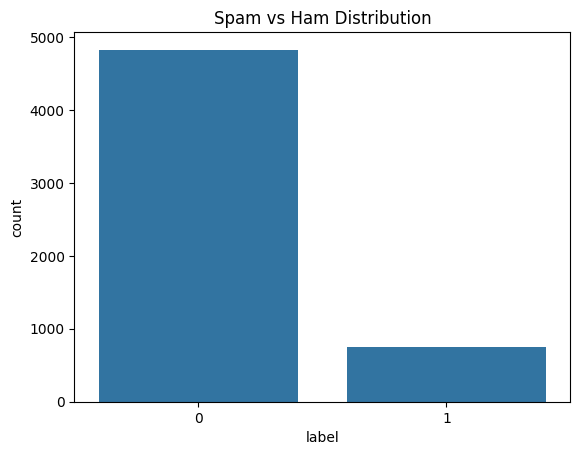

In [4]:
# Step 4: Visualize
sns.countplot(x='label', data=df)
plt.title("Spam vs Ham Distribution")
plt.show()

In [5]:
# Step 5: Train-Test Split and Vectorization
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2)

vectorizer = TfidfVectorizer(stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [6]:
# Step 6: Train Model
model = MultinomialNB()
model.fit(X_train_vec, y_train)

MultinomialNB()

In [7]:
# Step 7: Evaluate Model
y_pred = model.predict(X_test_vec)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.95695067264574
[[953   0]
 [ 48 114]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       953
           1       1.00      0.70      0.83       162

    accuracy                           0.96      1115
   macro avg       0.98      0.85      0.90      1115
weighted avg       0.96      0.96      0.95      1115



In [8]:
# Step 8: Predict Custom Messages
def predict_message(msg):
    msg_clean = clean_text(msg)
    vec = vectorizer.transform([msg_clean])
    pred = model.predict(vec)[0]
    return "Spam" if pred else "Ham"

print(predict_message("You won a free cruise! Call now!"))
print(predict_message("Hey, are we still on for lunch?"))

Spam
Ham
